<a href="https://colab.research.google.com/github/soukhind2/PRNI_summer_school/blob/master/Copy_of_Bayesian_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PRNI Summer School 2020
# Ideal Observer Analysis Tutorial


__Date__: Sep-14th-2020

__Live tutorial time__: 4:00pm - 5:30pm (Central European Summer Time, UTC +2)

__Lecturer:__ Prof. Máté Lengyel

__Tutor:__ Oana Stanciu 


This tutorial will guide you through a pipeline for performing ideal observer analysis. We will be  using a fictitious (behavioral) experiment to demonstrate step-by-step how to: 

1. Construct a graphical model 
2. Simulate data to explore the models
3. Ideal observer validation
4. Perform model estimation
5. Compare models


The goal of the tutorial is to demonstrate the conceptual steps of the pipeline rather than to provide an exhaustive (or optimized) analysis, which is why the code solutions are offered in folded "helper cells". Of course, there are multiple solutions, you do not need to use the suggested ones. If you are working in the Colab, you will need to double click to reveal their contents. 

Generally, these cells should work in local Jupyter environments, but it is possible that they will not be folded. There is an alternative version of the notebook without these helper cells if they are not compatible with your setup/ you'd rather not see them. 
    

##### Setup

Please load the necessary libraries for this tutorial.  

In [ ]:
import numpy as np
import random 
import scipy.stats as st 
import scipy.optimize
from sklearn.neighbors import KernelDensity

import matplotlib
%matplotlib inline

from matplotlib import rc
import matplotlib.pyplot as plt

We will use Latex for figure labels so we need to enable it in the Colab environment. You can skip this step if you are working outside of the Colab.

If you encounter an error with the installation, you can revert to using plain text for labels by restarting the notebook or you can comment out the plotting lines that use Latex.

In [ ]:
# Plotting settings - Running this cell will take a couple of minutes
#%%capture 

# Enable use of latex in figures 
rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

# Install the missing texlive package and its dependencies (which does not come with matplotlib in the colab environment)
# Skip this if running outside of the colab
!apt update && apt-get install cm-super dvipng texlive-fonts-recommended texlive-fonts-extra --fix-missing

In [ ]:
# If you are unable to complete the installation, switch back to regular text interpreter
#rc('text', usetex=False)

##Section 1: Defining the models


The question we will be addressing in this tutorial is whether humans treat sensory uncertainty normatively (in the Bayesian framework) or whether they use a heuristic strategy instead. As we will see in this tutorial, often the two strategies produce similar predictions for summary statistics, and the true litmus test is whether participants exhibit Bayes normative behavior at the trial level.

The analysis will be based on a behavioral experiment conducted by [Laquitaine and Gardner (2019)](https://www.sciencedirect.com/science/article/pii/S0896627317311340). The participants' task was to observe briefly presented random dot kinematograms and report the motion direction of the coherent dots. Throughout the experiment, the strength of both the prior (variance of the presented set of directions) and the evidence (motion coherence) was manipulated. On the basis of observing a bimodal  distribution of responses, Laquitaine and Gardner (2019) argued that trial-by-trial motion direction estimation is not Bayes normative, but rather follows a heuristic strategy according to which observers switch between making estimates from the prior or evidence. 

This tutorial will ask the same question, but will use a simplified mock experimental task for ease of demonstration. 
 
We will model two potential observers:

1. **Bayesian Observer**: performs Bayesin integration by combining the prior and the likelihood

2. **Switching Observer**: alternates between using estimates from the prior and from the sensory evidence as a function of their relative strength This observer approximates the Bayes optimal observer in summary statistics, but will diverge in trial-by-trial estimates.


####Bayesian Observer Model (left) and task design (right) from Laquitaine and Gardner (2019)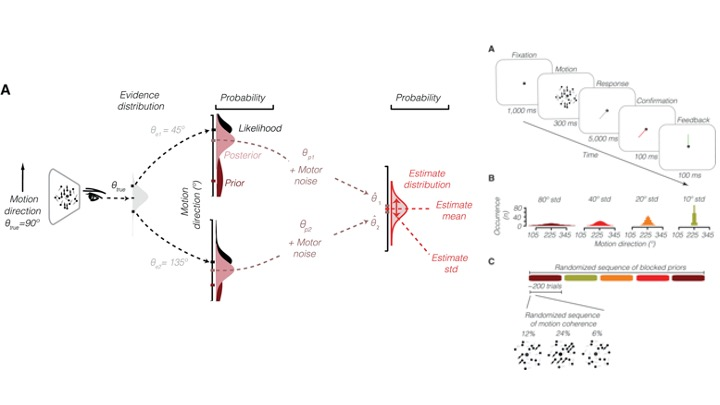

###Graphical model for the simplified task


We will first run through one trial of the task from the **observer's perspective** to illustrate how we assume the observer perceives the presented stimulus, makes inferences about the underlying true parameters that generated it, and responds.  For simplicity, the same prior and likelihood will be used for the entire task (rather than experimentally manipulating them across blocks like in the original experiment). 

The figure below shows the graphical model of this simplified version of the original Laquitaine and Gardner (2019) experiment. A graphical model should encapsulate all the dependencies between the relevant random variables. 


Colors indicate parameters observed by the <font color='blue'>experimenter</font> vs the <font color='green'>participant</font>.  

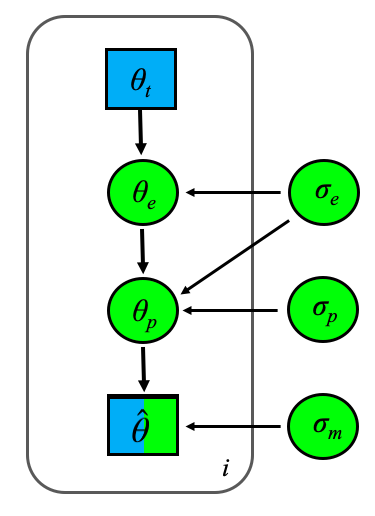

###Generation

On each trial *i*, the experimenter choses the true motion direction $\theta_t$ from a single Gaussian stimulus distribution which is centered on $\theta_\mu$. We will assume $\theta_{\mu}$ is known constant (so not a parameter). For simplicity we will assume that motion directions can described by a Gaussian. (In the paper the motion direction is described by a circular variable with a von Mises distribution.)

The observer has access to a sensory likelihood distribution centered on $\theta_e$, which is a sample from a Gaussian evidence distribution with mean $\theta_t$. Thus, on average, the most likely sensory evidence is the true value $\theta_t$, but this is not true across all trials. 

Do note that this is only an observer model, we are not accounting for learning across trials. That means that we assume we have trained participants who, therefore, use the same parameters (variances) throught the experimental session. 

#### Warm-up exercise: Draw samples from the prior and evidence distributions  


First, you will write a function that implements a Gaussian and then use it in order to draw samples from the prior:


$$ P(\theta_t) = \mathcal{N}(\theta_t; \theta_{\mu},\sigma_p^2)$$

Then, use the px_gaussian function created above to define the likelihood of the fixed observed $\theta_e$ as a function of the true stimulus $\theta_t$ and the noise of the evidence distribution $\sigma_e$. Draw one $\theta_e$ sample using a given $\theta_t$ and $\sigma_e$. 
$$ P(\theta_e | \theta_t) = 
\mathcal{N}(\theta_e; \theta_t,\sigma_e^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-(\theta_e-\theta_t)^2}{2\sigma^2}}
$$



In everyday practice, the inbuilt scipy.stats.norm or np.random.normal functions can be used to evaluate the Gaussian pdf, cdf or generate samples. 


In [ ]:
#Fill in the ... or get an error :  argument must be a string or a number, not 'ellipsis'

# Gaussian pdf
def px_gaussian(x, mu, sigma):
    """
    Gaussian pdf 
    
    Arguments:
        x (numpy array of floats): some values at which the gaussian is evaluated
        mu (scalar): mean 
        sigma (scalar): SD
    
    Returns: 
        (numpy array of floats) : Gaussian evaluated at `x`
    """

    #px = ...

    return px

# discrete range of possible theta_t values just for demo
x = np.arange(0, 180, 1) 

#let's say we are simulating the observer for a trial where: 
#feel free to change these values
theta_mu = 90
sigma_p = 10
sigma_e = 25

#Call px_gaussian to retrieve prior 
Prior_distribution = ...

#Draw one theta_t value from the prior 
theta_t = random.choices(x, weights=Prior_distribution, k=1)

#Given the selected theta_t value (and sigma_e), define the Evidence distribution
#Just like the prior this should sum to 1
Evidence_distribution = ...

#Generate a theta_e value by randomly sampling from the Evidence_distribution 
theta_e = ...

In [ ]:
#@title Show solution -- double click to reveal if you need help

# Gaussian pdf  
def px_gaussian(x, mu, sigma):
    """
    Gaussian pdf 
    
    Arguments:
        x (numpy array of floats): points at which the gaussian is evaluated
        mu (scalar): mean 
        sigma (scalar): SD
    
    Returns: 
        (numpy array of floats) : Gaussian evaluated at `x`
    """

    px = np.exp(- 1/(2*sigma**2) * (mu - x) ** 2)

    return px


x = np.arange(0, 180, 1) # range of possible theta_t values for a discretized prior (just for demo)
theta_mu = 90
sigma_p = 10
sigma_e = 25

#Call px_gaussian to retrieve prior 
Prior_distribution = px_gaussian(x, theta_mu, sigma_p)
Prior_distribution /= Prior_distribution.sum()

#Draw one theta_t value from the prior
theta_t = random.choices(x, weights=Prior_distribution, k=1)

#Given the selected theta_t value (and sigma_e), define the Evidence distribution
Evidence_distribution = px_gaussian(x, theta_t, sigma_e)
Evidence_distribution /= Evidence_distribution.sum()

#Generate a theta_e sample by randomly sampling from the Evidence_distribution 
theta_e = random.choices(x, weights=Evidence_distribution, k=1)

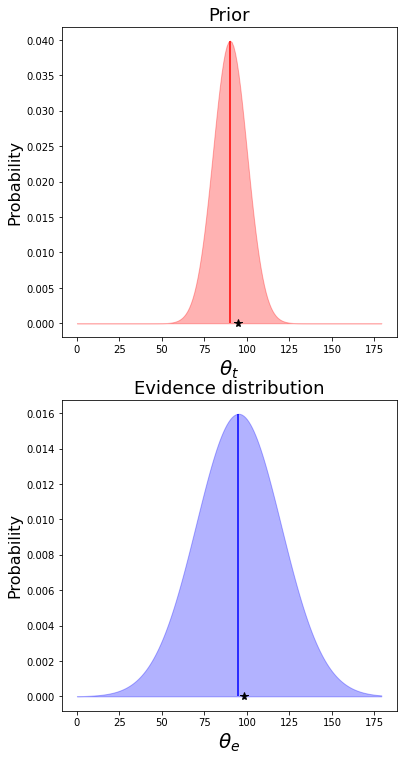

In [ ]:
#Plot the distributions and the samples values
plt.subplots(2,1, figsize = (6,4))
plt.subplots_adjust(top = 2.5)

#Plot the prior
plt.subplot(2,1,1)
plt.fill_between(x, 0, Prior_distribution, alpha = .3, color='red')
plt.vlines(theta_mu, ymin = 0, ymax = np.max(Prior_distribution), color = 'red')
plt.plot(theta_t,  0, marker ='*', markersize = 8, color = 'black')
plt.xlabel(r'$\theta_t$', fontsize = 20)
plt.ylabel('Probability', fontsize = 16)
plt.title('Prior', fontsize = 18)

#Plot the evidence distribution
plt.subplot(2,1,2)
plt.fill_between(x, 0, Evidence_distribution, alpha = .3, color = 'blue')
plt.vlines(theta_t, ymin = 0, ymax = np.max(Evidence_distribution), color = 'blue')
plt.plot(theta_e, 0, marker = '*', markersize = 8, color = 'black' )
plt.xlabel(r'$\theta_e$', fontsize = 20)
plt.ylabel('Probability', fontsize = 16)
plt.title('Evidence distribution', fontsize = 18);

Notice that the mean of the Evidence distribution is the previously sampled $\theta_t$ value.

###Inference 

The observer has to make a perceptual inference about the motion direction they saw. 

**Bayesian Observer**

The Bayesian observer will combine the prior and likelihood using Bayes' rule to compute the posterior over the true $\theta_t$: 

$$ P(\theta_t| \theta_e)  = \frac{P(\theta_e| \theta_t) P(\theta_t)}{P(\theta_e)}$$

They will then choose their estimate from the posterior by applying a cost function. Here, we will assume that observers use the MAP estimate, the mode of the posterior distribution which minimizes 0-1 loss:

$$\theta_p = \arg\max_{\theta_t} P(\theta_t| \theta_e) $$

If you want to apply a higher cost for increasing error, you can instead choose to minimize: quadratic loss (choose posterior mean) or absolute loss (choose posterior median). What is the relationship between the mean, median and mode for a Gaussian?

This is a good time to go back to the graphical model to check if the drawn conditional dependencies make sense to you.  

**Switching Observer**

The switching observer chooses either the prior mean or the evidence mean as their estimate in proportion to how much uncertainty they have about these quantities. We will define a "switching ratio":

$$ p_{prior} = \frac{\sigma_e}{\sigma_p + \sigma_e} $$
$$ P(\theta_p| \theta_e) = p_{prior} \delta(\theta_p - \mu)+ (1 - p_{prior} )\delta(\theta_p - \theta_e)$$


This means that if $\sigma_p$ < $\sigma_e$, the observer is more likely to choose the prior mean as their response.


####Exercise 2: Produce the estimated percept for the two observers

Both the prior and the sensory evidence are formalized as Gaussian distributions, so we can use analytic formula for multiplying two gaussian PDFs to compute the resulting Gaussian posterior or multiply the likelihood and prior computationally. 
For every trial: 

$$ P(\theta_t | \theta_e)= \mathcal{N}\left(\theta_t; \frac{\sigma^2_{e}\theta_\mu+\sigma^2_{p}\theta_{e}}{\sigma^2_{e}+\sigma^2_{p}}, \frac{\sigma^2_{e}\sigma^2_{p}}{\sigma^2_{e}+\sigma^2_{p}} \right) $$



As a first step, let's define the likelihood function by using the same function (px_gaussian) that we used to obtain the evidence distribution. 
What is the difference between the two?

The evidence distribution and the likelihood use the same function, but take different arguments. The evidence distribution tells us about the probability of outcomes (data) given fixed parameters. As such, it should sum to 1.

The likelihood fixes the data, and gives us a relatively likelihood for the parameters. As such, this doesn't need to sum to 1 as it is not a probability distribution.

Of course, for an ideal observer the likelihood and the evidence distribution need to use the same functional form. A trained observer's belief about how the data were generated needs to match the true way in which they were produced.

In [ ]:
#Define the likelihood function
LH_function = lambda theta_e, theta_t, sigma_e : px_gaussian(theta_e, theta_t, sigma_e)
#Bayesian observer's beliefs about the likelihood of true motions in a trial where the sensory evidence is theta_e
Likelihood = LH_function(theta_e, x, sigma_e)

#We could redefine the Evidence distribution if we want: for a given theta_t, sigma_e
#Evidence_distribution = LH_function(x, theta_t, sigma_e)

In [ ]:
#Posterior distribution
Posterior_distribution = ...

#Choose MAP as theta_p
theta_p_bayes = ...

In [ ]:
#@title Show solution

#Posterior distribution - computational
Posterior_distribution = Prior_distribution * Likelihood
Posterior_distribution /= Posterior_distribution.sum()

#Posterior distribution - analytical 
#Posterior_distribution = px_gaussian(x, (sigma_e**2*theta_mu + sigma_p**2*theta_e)/(sigma_e**2 + sigma_p**2), sigma_e**2*sigma_p**2/(sigma_e**2+sigma_p**2) )
#Posterior_distribution /= Posterior_distribution.sum()

#Choose MAP as theta_p
theta_p_bayes = x[np.argmax(Posterior_distribution)] 

In [ ]:
#Switching observer's estimation for the same trial

#compute the switching ratio
p_prior = sigma_e/ (sigma_p + sigma_e)

#choose theta_p from the prior mean or the evidence
theta_p_switch = ...

In [ ]:
#@title Show solution
#Switching observer's estimation for the same trial

#compute the switching ratio
p_prior = sigma_e/ (sigma_p + sigma_e)

#choose theta_p from the prior mean or the evidence
theta_p_switch = random.choices([theta_mu, theta_e], weights = [p_prior, 1-p_prior],k = 1)[0]

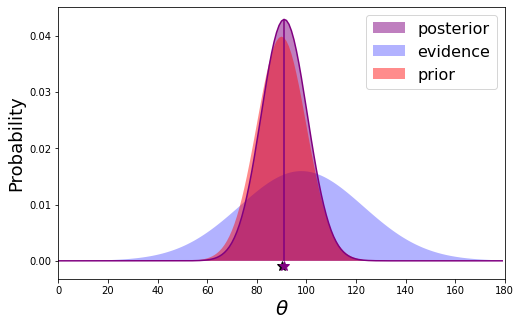

In [ ]:
#Plot the prior, likelihood, posterior and the inferred theta_p's
plt.figure(figsize = (8,5))

plt.fill_between(x, 0, Posterior_distribution, alpha = .5, facecolor = 'purple', label = 'posterior')
plt.fill_between(x, 0, Likelihood/Likelihood.sum(), alpha = .3, facecolor = 'blue', label = 'evidence')
plt.fill_between(x, 0, Prior_distribution, alpha = .45, facecolor = 'red', label = 'prior')
plt.legend(fontsize = 16)

plt.plot(x, Posterior_distribution,  color = 'purple')
plt.xlim([0,180])

plt.vlines(theta_p_bayes, ymin = 0, ymax = np.max(Posterior_distribution), color = 'purple')
plt.plot(theta_p_switch, -.001, '*',markersize = 10, color = 'black')
plt.plot(theta_p_bayes, -.001, '*',markersize = 10, color = 'purple')
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel('Probability', fontsize = 18);

You can adjust the parameter values to explore their effect on the posterior.

###Motor Responses

The participants' responses are assumed to be realizations of the inferred $\theta_p$ that are corrupted by motor noise:
$$ P(\hat{\theta}| \theta_p) = \mathcal{N}(\hat{\theta}; \theta_p, \sigma_m^2) $$



In [ ]:
#draw a sample from the motor noise distribution 
sigma_m = 5

theta_hat_bayes = random.choices(x, weights = px_gaussian(x, theta_p_bayes, sigma_m), k=1)
theta_hat_switch = random.choices(x, weights = px_gaussian(x, theta_p_switch, sigma_m), k=1)

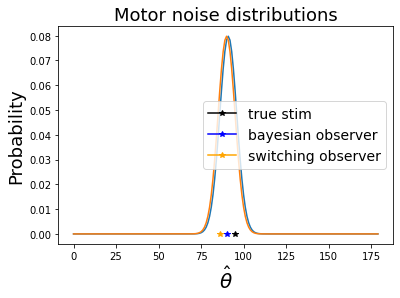

In [ ]:
plt.plot(theta_t,0, marker = '*', color = 'black', label = 'true stim')
plt.plot(theta_hat_bayes, 0, marker = '*', color = 'blue', label = 'bayesian observer')
plt.plot(theta_hat_switch, 0, marker = '*', color = 'orange', label = 'switching observer')
plt.legend( fontsize = 14)

plt.plot(x, px_gaussian(x, theta_p_bayes, sigma_m)/np.sum(px_gaussian(x, theta_p_bayes, sigma_m)))
plt.plot(x, px_gaussian(x, theta_p_switch, sigma_m)/np.sum(px_gaussian(x, theta_p_switch, sigma_m)))
plt.xlabel(r'$\hat{\theta}$', fontsize = 20)
plt.ylabel('Probability', fontsize = 18);
plt.title('Motor noise distributions', fontsize = 18);

Putting everything we have so far together, let's simulate and plot N observer responses for a given $\theta_t$ value and compare these with our predicted distribution of responses. 

In [ ]:
#Bayesian observer simulation 

theta_t = 120 

theta_mu = 90; sigma_p = 10; sigma_e = 15; sigma_m = 2
n = 1000

#simulate the noisy perception theta_e from the vector theta_t
theta_e = np.random.normal(theta_t, sigma_e, n)

#trial specific theta_p's - note that we only need the summary statistics to obtain the theta_p
theta_p = ...

#add the motor noise to every trial's theta_p
theta_hat = np.random.normal(theta_p, sigma_m, n)


In [ ]:
#@title Show solution
#Bayesian observer simulation

theta_t = 120

theta_mu = 90; sigma_p = 15; sigma_e = 10; sigma_m = 6
n = 1000000

#simulate the noisy perception theta_e from the vector theta_t
theta_e = np.random.normal(theta_t, sigma_e, n)

#trial specific theta_p's - note that we only need the summary statistics to obtain the theta_p
theta_p = (theta_mu * sigma_e**2 + theta_e * sigma_p**2) / (sigma_e**2 + sigma_p**2)

#add the motor noise to every trial's theta_p
theta_hat = np.random.normal(theta_p, sigma_m, n)

We simulated the data, now what is our prediction about the shape of the resulting distibution of estimates?

In [ ]:
#Bayesian observer posterior moments (P(theta_t|theta_e))
post_mu = ...
post_var = ...

#Adding motor noise to get theta_hat posterior distribution
#Hint: Here we are adding two Gaussians, one of which has mean 0
theta_hat_mu = ...
theta_hat_var = ...

x = np.arange(np.min(theta_hat),np.max(theta_hat), 1)
theta_hat_pdf = px_gaussian(...) 

In [ ]:
#Bayesian observer posterior summary stats (P(theta_t|theta_e))
post_mu = (theta_mu * sigma_e**2 + theta_t * sigma_p**2) / (sigma_e**2 + sigma_p**2)
post_var = (sigma_e**2 * sigma_p**2) / (sigma_e**2 + sigma_p**2)

##Adding motor noise to get theta_hat posterior distribution
theta_hat_mu = post_mu 
theta_hat_var =  (post_var + sigma_m**2) 
x = np.arange(np.min(theta_hat),np.max(theta_hat)+1, 1)
theta_hat_pdf = px_gaussian(x, theta_hat_mu, np.sqrt(theta_hat_var)) 

print(np.mean(theta_hat), theta_hat_mu)
print(np.std(theta_hat), np.sqrt(theta_hat_var))


41.52708842443815 41.53846153846154
9.158511786739782 10.258204971181323


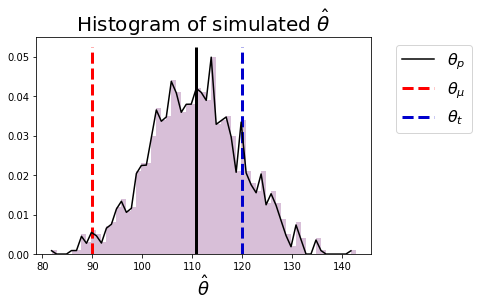

In [ ]:
#plot as histogram
counts, edges, plot = plt.hist(theta_hat, bins=x, density = True, color = 'thistle')
plt.plot(x[:-1], theta_hat_pdf[:-1] * counts, color = 'black', label = r'$\theta_p$')
ylims = plt.gca().get_ylim()
plt.vlines(theta_mu, ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'red', linestyle = '--', label = r'$\theta_{\mu}$')
plt.vlines(theta_t, ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'mediumblue', linestyle='--', label = r'$\theta_t$')
plt.vlines(post_mu, ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'black')
plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1), loc='upper left');

plt.xlabel(r'$\hat{\theta}$', fontsize = 18)
plt.title(r'Histogram of simulated $\hat{\theta}$', fontsize = 20);

Check how the regression towards the mean (prior) is affected by increasing $\sigma_p$ and decreasing $\sigma_e$.


Let's repeat this for the Switching observer.

In [ ]:
#Switching observer simulation with the same parameters

theta_t = 120

theta_mu = 90; sigma_p = 10; sigma_e = 15; sigma_m = 6
n = 1000

#simulate the noisy perception theta_e from the vector theta_t
theta_e = np.random.normal(theta_t, sigma_e, n)

#trial specific theta_p's - note that we only need the summary statistics to obtain the theta_p
p_prior = sigma_e/ (sigma_p + sigma_e)
theta_p = ...

#add the motor noise to every trial's theta_p
theta_hat = np.random.normal(theta_p, sigma_m, n)

#now let's make predictions about the resulting distribution shape
x = np.arange(np.min(theta_hat), np.max(theta_hat), 1)
theta_hat_pdf = ...

In [ ]:
#@title Show solution
#Switching observer simulation with the same parameters

theta_t = 120

theta_mu = 90; sigma_p = 10; sigma_e = 15; sigma_m = 6
n = 1000

#simulate the noisy perception theta_e from the vector theta_t
theta_e = np.random.normal(theta_t, sigma_e, n)

#trial specific theta_p's - note that we only need the summary statistics to obtain the theta_p
p_prior = sigma_e/ (sigma_p + sigma_e)
theta_p = np.zeros(n)
for i in range(n): # for every trial 
  theta_p[i] = random.choices([theta_mu, theta_e[i]], weights = [p_prior, 1-p_prior],k = 1)[0]

#add the motor noise to every trial's theta_p
theta_hat = np.random.normal(theta_p, sigma_m, n)   

x = np.arange(np.min(theta_hat), np.max(theta_hat), 1)
theta_hat_pdf = p_prior * px_gaussian(x, theta_t, np.sqrt(sigma_e**2 + sigma_m**2)) + \
      (1- p_prior) * px_gaussian(x, theta_mu, np.sqrt(sigma_p**2 + sigma_m**2))


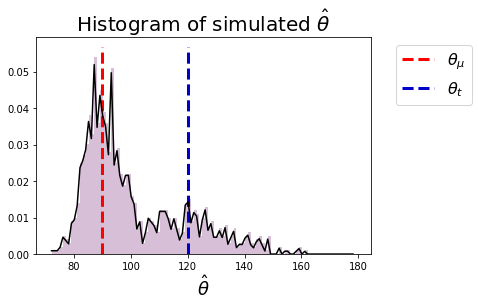

In [ ]:
#plot as histogram
counts, edges, plot = plt.hist(theta_hat, density= True, bins=x, color = 'thistle')
plt.plot(x[:-1], theta_hat_pdf[:-1]*counts, color = 'black')

ylims = plt.gca().get_ylim()
plt.vlines(theta_mu, ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'red', linestyle = '--', label = r'$\theta_{\mu}$')
plt.vlines(theta_t, ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'mediumblue', linestyle='--', label = r'$\theta_t$')
plt.legend(fontsize = 16, bbox_to_anchor=(1.05, 1), loc='upper left');

plt.xlabel(r'$\hat{\theta}$', fontsize = 18)
plt.title(r'Histogram of simulated $\hat{\theta}$', fontsize = 20);

What combinations of  $\sigma_p$  and  $\sigma_e$  do you expect to lead to more bimodal distributions?
If you want to convince yourself you can use the previous code to simulate responses with for a fixed theta_t and sigma_p, while varying sigma_e.

Hypothetically, how would you formally assess the bimodality?

##Section 2: Simulating observers

Now we will simulate datasets for an entire experimental session (many trials with various $\theta_t s$) from each of the models to understand their behavior and, test the effect of different parameter values (e.g. the conditions described in the original experiment).

First, we will construct two functions that put together the previous code snippets to simulate a complete dataset for each of the two observer models. This is nearly identical to what we have done before for a fixed $\theta_t$.

In [ ]:
def simulate_bayes_observer(n, theta_mu, sigma_p, sigma_e, sigma_m):
    """
    Returns the responses of the Bayesian observer given all parameters of the graphical model

    Arguments:
        n (scalar): number of trials to simulate
        theta_mu (scalar): known prior mean 
        sigma_p (scalar): SD of prior
        sigma_e (scalar): SD of the evidence
        sigma_m (scalar): SD of the motor noise
    
    Returns: 
        theta_t(numpy array of int) : true stimuli 
        theta_e(numpy array of floats) : noise corrupted stimulus (evidence)
        theta_hat(numpy array of floats) : responses of the Bayesian Observer 
    """

    #Here, we only need the summary statistics to generate responses so we can 
    #simplify the generation code used for demonstration

    #generate the vector of true stimuli 
    theta_t = np.random.normal(theta_mu, sigma_p, n)

    #simulate the noisy perception theta_e from the vector theta_t
    theta_e = np.random.normal(theta_t, sigma_e, n)

    #trial specific theta_p's
    theta_p = (theta_mu * sigma_e**2 + theta_e * sigma_p**2) / (sigma_e**2 + sigma_p**2)

    #add the motor noise to every trial's theta_p before sampling the response
    theta_hat = np.random.normal(theta_p, sigma_m, n)

    ## How we would do this using the grid as in the one-trial example if you find that easier to follow

    #range of possible theta_t values
    # x = np.arange(0,180,1)

    # #generate the vector of true stimuli theta_t from the scalar theta_mu 
    # theta_t = np.array(random.choices(x, st.norm.pdf(x,theta_mu, sigma_p), k = n))
    
    # #simulate the noisy perception theta_e from the vector theta_t
    # theta_e = np.random.normal(theta_t, sigma_e, n )

    # #Prior is shared for all trials
    # Prior_distribution = st.norm.pdf(x ,theta_mu, sigma_p)
    # Prior_distribution /= Prior_distribution.sum()

    # #But the likelihood is trial specific
    # Likelihood = np.zeros((len(theta_e), len(x)))
    # for i in range(n):
    #   Likelihood[i,:] = st.norm.pdf(theta_e[i], x, sigma_e)

    # #posterior proportional to likelihood x prior for every trial
    # Posterior_distribution = Likelihood * Prior_distribution  

    # #find index of MAP for every trial
    # idx = np.argmax(Posterior_distribution, axis = 1)
    # #choose theta_p = MAP
    # theta_p = x[idx]

    #add the motor noise to every trial's theta_p
    #theta_hat = np.random.normal(theta_p, sigma_m, n)

    return theta_t, theta_e, theta_hat


In [ ]:
def simulate_switch_observer(n, theta_mu, sigma_p, sigma_e, sigma_m):
    """
    Returns the responses of the Switching observer given all parameters of the graphical model

    Arguments:
        n (scalar): number of trials to simulate
        theta_mu (scalar): known prior mean 
        sigma_p (scalar): SD of prior
        sigma_e (scalar): SD of the evidence
        sigma_m (scalar): SD of the motor noise
    
    Returns: 
        theta_t(numpy array of int) : true stimuli 
        theta_e(numpy array of floats) : noise corrupted stimulus (evidence)
        theta_hat (numpy array of floats) : responses of the Switching Observer 
    """

    #generate the vector of true stimuli 
    theta_t = np.random.normal(theta_mu, sigma_p, n)

    #simulate the noisy perception theta_e 
    theta_e = np.random.normal(theta_t, sigma_e, n)
    
    #If we want to return to the discretized prior from the demo
    #range of possible theta_t values
    #x = np.arange(0,180,1)
    #generate the vector of true stimuli theta_t
    #theta_t = np.array(random.choices(x, st.norm.pdf(x,theta_mu, sigma_p), k = n))

    #compute the switching ratio
    #since all trials have the same prior and likelihood, there is only one switching ratio
    p_prior = sigma_e/ (sigma_p + sigma_e)
    theta_p = np.zeros(n)
    for i in range(n): # for every trial 
      theta_p[i] = random.choices([theta_mu, theta_e[i]], weights = [p_prior, 1-p_prior],k = 1)[0]

    #add the motor noise
    theta_hat = np.random.normal(theta_p, sigma_m, n)
    
    return theta_t, theta_e, theta_hat

###Summary Statistics

We will now simulate observers with different parametrizations and look at the summary statistics of their responses to explore if the models behave similarly and in line with our expectations. 

What will be effect of increasing the motion coherence, characterized by $\sigma_e$ on the mean and stadard deviation of the observers' motion direction estimates?

What about the effect of increasing the width of the prior, $\sigma_p$?

In [ ]:
# Create helper function to bin data for plotting and compute means and stds
# for optimal results, bin width may need to be narrower or wider as a function of the data

def create_bins(x,y, bin_width = 5):
  """
  Outputs the means and SDs of values from the y-vector in bins
   of size bin_width over the vector x

  Arguments:

  x (array): array of the values at which y is evaluated
  y (array): array
  bin_width (scalar): width of the x bins, defaults to 5

  Returns: 
     bins (numpy array of floats) :  bin start value
     bin_means (numpy array of floats) : mean of y within bins of x 
  """

  bins = np.arange(np.ceil(np.min(x)), np.floor(np.max(x)), bin_width)
  digitized = np.digitize(x, bins)
  #to-do: add code to skip empty slices
  bin_means = np.array([y[digitized == i].mean() for i in range(1, len(bins))])
  bin_stds = np.array([y[digitized == i].std() for i in range(1, len(bins))])

  return bins[:-1], bin_means, bin_stds

def plot_response_distribution(theta_t, theta_hat, theta_mu, binwidth=20):
  """
  For every interval of size binwidth defined over the theta_t values, 
  plots a histogram of responses on all trials where the theta_t was presented 
  Step used since plotting all the distributions can break the colab

  Arguments:

  theta_t (numpy array of floats)
  theta_hat (numpy array of floats) 
  binwidth (scalar) : how finely to sample theta_t's 
                  do not sample too many values, or the notebook might crash during plotting 

  """
  
  theta_range = np.arange(np.min(theta_t)+20, np.max(theta_t)-20, binwidth)
  
  plt.subplots(len(theta_range),1, figsize = (4,10))
  plt.subplots_adjust(hspace=None)

  for i in range(len(theta_range)-1):

    #select responses for which theta is in the desired range
    condition = np.where((theta_t < theta_range[i+1]) & (theta_t > theta_range[i]))
    resp = theta_hat[condition]

    plt.subplot(len(theta_range), 1, i+1)
    plt.hist(resp, color = 'lightblue')
    ylims = plt.gca().get_ylim()
    plt.vlines(theta_range[i], ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'darkblue')
    plt.vlines(theta_mu, ymin = ylims[0], ymax = ylims[1], linewidth = 3, color = 'black')
    plt.xlim([np.min(theta_t), np.max(theta_t)])

  plt.xlabel(r'$\hat{\theta}$', fontsize = 18)

In [ ]:
# function to aid plotting of summary statistics for agents simulated from the two models using different parameter settings (or experimental conditions)

def plot_summary_statistics(generation_function, n, theta_mu, sigma_p_narrow, sigma_p_wide, sigma_e_narrow, sigma_e_wide, sigma_m, bin_width = 5):
  """
  Plots the summary statistics (mean and std of estimates motion directions) as a function of true motion direction for the stimulated observes
  for the specified 2 x 2 parameter settings

  Arguments:

  generation_function (function): which observer model should be used in the stimulation
  n, theta_mu, sigma_p_wide, sigma_e_narrow, sigma_m: parameters to be passed to generation function 
  """

  fig, ax  = plt.subplots(2,2, figsize=(11,11))
  
  ax1 = plt.subplot(2,2,1)
  theta_t, _, theta_hat = generation_function(n, theta_mu, sigma_p_wide, sigma_e_narrow, sigma_m)
  bins1, bin_means1, bin_stds1 = create_bins(theta_mu - theta_t, theta_mu - theta_hat, bin_width)
  plt.plot(bins1, bin_means1, 'r.', markersize = 15, color = 'maroon')
  plt.vlines(0, ymin = np.min(bin_means1), ymax = np.max(bin_means1), color = 'gray', linestyle = '--')
  plt.hlines(0, xmin = np.min(bins1), xmax = np.max(bins1), color = 'gray', linestyle = '--')
  plt.plot(bins1, bins1, color = 'gray', linestyle='--')

  theta_t, _, theta_hat = generation_function(n, theta_mu, sigma_p_narrow, sigma_e_narrow, sigma_m)
  bins2, bin_means2, bin_stds2 = create_bins(theta_mu - theta_t, theta_mu - theta_hat, bin_width/2)
  plt.plot(bins2, bin_means2, 'r.', markersize = 15, color = 'sandybrown')
  plt.ylabel('Mean estimates distance \n relative to the prior mean', fontsize = 16)
  plt.title('High motion coherence (less nosy evidence)', fontsize = 16)
  plt.setp(ax1.get_xticklabels(), fontsize =10)
  plt.setp(ax1.get_yticklabels(), fontsize =10)


  ax2 = plt.subplot(2,2,2, sharex = ax1, sharey=ax1)
   
  theta_t, _, theta_hat = generation_function(n, theta_mu, sigma_p_wide, sigma_e_wide, sigma_m)
  bins3, bin_means3, bin_stds3 = create_bins(theta_mu - theta_t, theta_mu - theta_hat, bin_width)
  plt.plot(bins3, bin_means3, 'r.', markersize = 15, color = 'maroon')
  plt.vlines(0, ymin = np.min(bin_means1), ymax = np.max(bin_means1), color = 'gray', linestyle = '--')
  plt.hlines(0, xmin = np.min(bins1), xmax = np.max(bins1), color = 'gray', linestyle = '--')
  plt.plot(bins1, bins1, color = 'gray', linestyle='--')

  theta_t4, _, theta_hat4 = generation_function(n, theta_mu, sigma_p_narrow, sigma_e_wide, sigma_m)
  bins4, bin_means4, bin_stds4 = create_bins(theta_mu - theta_t4, theta_mu - theta_hat4, bin_width/2)
  plt.plot(bins4, bin_means4, 'r.', markersize = 15, color = 'sandybrown')
  plt.title('Low motion coherence', fontsize = 16)

  ax3 = plt.subplot(2,2,3, sharex = ax1)

  plt.plot(bins1, bin_stds1, 'r.', markersize = 15, color = 'maroon')
  plt.plot(bins2, bin_stds2, 'r.', markersize = 15, color = 'sandybrown')

  #plt.vlines(0, ymin = 0, ymax = np.max(bin_stds3), color = 'gray', linestyle = '--')
  plt.xlabel('Motion directions distance \n relative to the prior mean', fontsize = 16)
  plt.ylabel('Estimate standard deviation', fontsize = 16)
  plt.legend({'Wide prior', 'Narrow prior'}, fontsize = 16, loc = 'lower left')
  plt.setp(ax1.get_yticklabels(), fontsize =10)

  ax4 = plt.subplot(2,2,4, sharex = ax1, sharey = ax3)

  plt.plot(bins3, bin_stds3, 'r.', markersize = 15, color = 'maroon')
  plt.plot(bins4, bin_stds4, 'r.', markersize = 15, color = 'sandybrown')

  #plt.vlines(0, ymin = 0, ymax = np.max(bin_stds3), color = 'gray', linestyle = '--')
  plt.xlabel('Motion directions distance \n relative to the prior mean', fontsize = 16)


Simulate 4 observers for each model creating a 2x2 (narrow vs. wide SDs) design for the width of $\sigma_e$ and $\sigma_p$. 

Explore the effect of changing these parameters on summary statistics of responses.


In [ ]:
n = 10000 # number of trials for a simulated participant

#please make choices consistent with the 0-180degrees range of possible motion directions

theta_mu = 100
sigma_m = 0

sigma_p_narrow = 15  # narrow prior 
sigma_p_wide = 80    # wide prior

sigma_e_narrow = 15   # narrow likelihood
sigma_e_wide = 80    # wide likelihood

Bayesian Observer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtyp

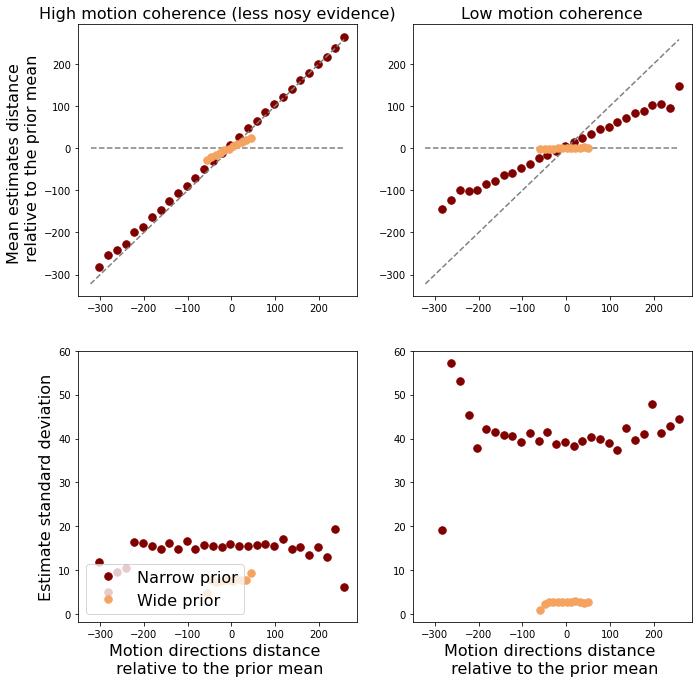

In [ ]:
print('Bayesian Observer')
plot_summary_statistics(simulate_bayes_observer, n, theta_mu,\
                        sigma_p_narrow, sigma_p_wide, sigma_e_narrow, sigma_e_wide, sigma_m, 20)

#You migtht get empty slice warnings for some of the param settings

Switching Observer


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtyp

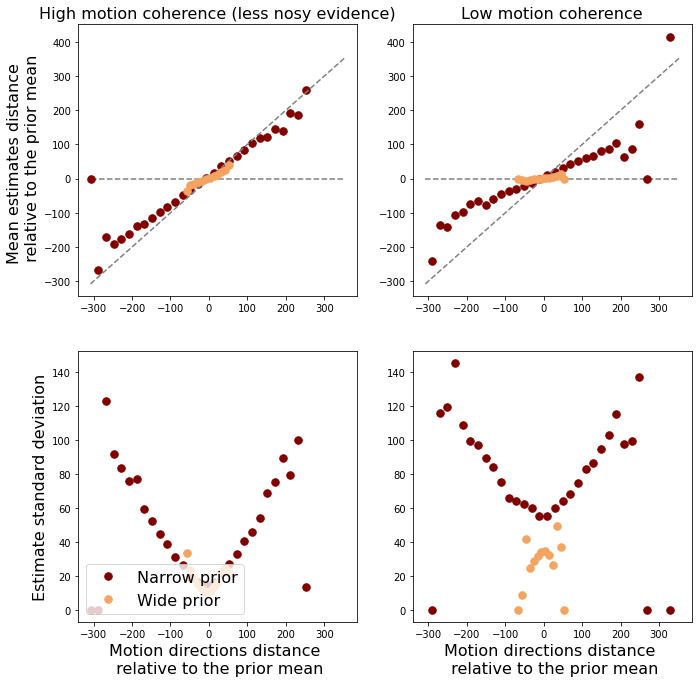

In [ ]:
print('Switching Observer')
plot_summary_statistics(simulate_switch_observer, n, theta_mu,\
                        sigma_p_narrow, sigma_p_wide, sigma_e_narrow, sigma_e_wide, sigma_m, 20)

Do the summary statistics conform to your expectations?

The similarity of the two models in terms of summary statistics drives home the importance of our previous exploration of the distribution of responses. In the case of a real dataset, you could subset a participant's responses based by the true stimulus presented to obtain multiple histograms of estimates like in the previous section. 

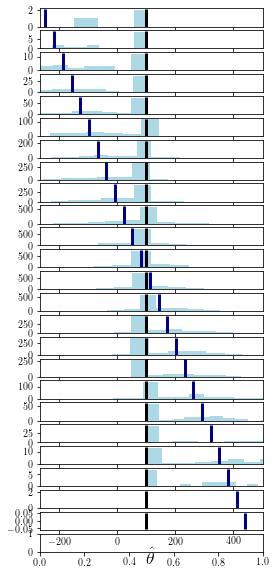

In [ ]:
#theta_t, theta_e, theta_hat = simulate_bayes_observer(n, theta_mu, sigma_p_wide, sigma_e_wide, sigma_m)
theta_t, theta_e, theta_hat = simulate_switch_observer(n, theta_mu, sigma_p_wide , sigma_e_wide, sigma_m)
plot_response_distribution(theta_t, theta_hat, theta_mu, 30)  

###Section 2: Ideal observer validation 
 **Kolmogorov-Smirnof plot**

This is a first sanity check if the ideal observer represents uncertainty in a self-consistent manner. 
You can do this with a prior and posterior predictive check in which you examine the degree to which data generated from the model departs from data generated from the true distribution. Particularly, we could evaluate the PDF of the posterior (obtained from the simulations) at the true $\theta_t$ value, and analyse the distribution of these evaluations over all trials. 
However, here the posterior of the ideal observer is different on every trial.

Rather than evaluating the PDF of the posterior at the true $\theta_t$, the solution is to evaluate the cdf of the posterior. The CDF is steep where the density of the original distribution is high and flat where the density of the original distribution
is low. Therefore, if the ideal observer is well-calibrated, the CDF of the $\theta_t$ distribution is uniform, because even though the posterior is different on every trial, the distribution of the CDF-transformed variable is the same on each trial.

If you want a quick intuitive demonstration, you can look at the example of the resulting cdf for a couple of trials.

Text(0.5, 1.0, 'Histrogram')

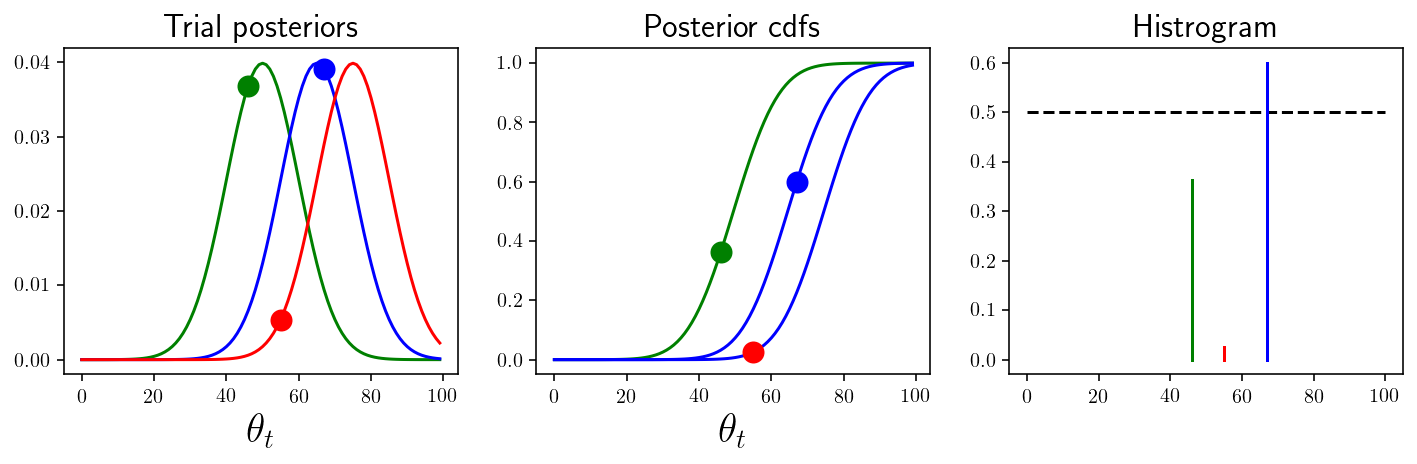

In [ ]:
# let's assume we have theta1 and theta2 which are two true values of theta_t and post1 and post2 are the posteriors for those trials
x = np.arange(0,100, 1)
post1 = st.norm.pdf(x,50, 10)
post2 = st.norm.pdf(x,65, 10)
post3 = st.norm.pdf(x,75, 10)
post1 /= post1.sum()
post2 /= post2.sum()
post3 /= post2.sum()

cdf1 = np.cumsum(post1)
cdf2 = np.cumsum(post2)
cdf3 = np.cumsum(post3)

theta1 = 46
theta2 = 67
theta3 = 55

plt.subplots(1,3,figsize = (12,3))
plt.subplot(1,3,1)
plt.plot(x, post1, color = 'green')
plt.plot(x, post2, color = 'blue')
plt.plot(x, post3, color = 'red')
plt.plot(theta1,post1[theta1] , 'r.', color = 'green', markersize = 20)
plt.plot(theta3,post3[theta3] , 'r.', color = 'red', markersize = 20)
plt.plot(theta2,post2[theta2] , 'r.', color = 'blue', markersize = 20)
plt.xlabel(r'$\theta_t$', fontsize = 20)
plt.title('Trial posteriors', fontsize = 16)

plt.subplot(1,3,2)
plt.plot(x, cdf1, color = 'green')
plt.plot(x, cdf2, color = 'blue')
plt.plot(x, cdf3, color = 'blue')
plt.xlabel(r'$\theta_t$', fontsize = 20)
plt.plot(theta1, cdf1[theta1], 'r.', color = 'green', markersize = 20)
plt.plot(theta2, cdf2[theta2], 'r.', color = 'blue', markersize = 20)
plt.plot(theta3, cdf3[theta3], 'r.', color = 'red', markersize = 20)
plt.title('Posterior cdfs', fontsize = 16)

plt.subplot(1,3,3)
plt.plot([theta1, theta1] , [0, cdf1[theta1]], color = 'green')
plt.plot([theta2, theta2] , [0, cdf2[theta2]], color = 'blue')
plt.plot([theta3, theta3] , [0, cdf3[theta3]], color = 'red')
plt.hlines(.5, 0, 100, linestyle = '--')
plt.title('Histrogram', fontsize = 16);

A validation of this method is to apply it to samples drawn from the posterior. The distribution of the cdf at these samples must be uniform.

To show that this does not happen unless the ideal observer is consistent, we can shuffle the posteriors on which the cdf of the true $\theta_t$ is applied. 

Exercise: Adapt the previous simulation function to also output the CDF evaluated at the true theta_t.

In [ ]:
#create a new simulation function that also outputs the cdf evaluated at the true theta_t
def ks_test(n, theta_mu, sigma_p, sigma_e, sigma_m):
    """
    Returns the responses of the Bayesian observer given all parameters of the graphical model

    Arguments:
        n (scalar): number of trials to simulate
        theta_mu (scalar): known prior mean 
        sigma_p (scalar): SD of prior
        sigma_e (scalar): SD of the evidence
        sigma_m (scalar): SD of the motor noise
    
    Returns: 
        Posterior_distribution, theta_t
        theta_t_cdf, posterior_sample_cdf, shuffled_posterior_sample_cdf (numpy array of floats):
                         cdf evaluated at theta_t, posterior samples, shuffled theta_t 
    """

    #discretized theta values
    x = np.arange(0, 180, 1)

    #generate the vector of true stimuli theta_t
    theta_t = np.array(random.choices(x, weights = st.norm.pdf(x, theta_mu, sigma_p), k = n))

    #simulate the noisy perception theta_e 
    theta_e = np.random.normal(theta_t, sigma_e, n)

    #prior 
    Prior_distribution = st.norm.pdf(x ,theta_mu, sigma_p)
    Prior_distribution /= Prior_distribution.sum()

    #evidence
    Likelihood = np.zeros((len(theta_e), len(x)))
    for i in range(n):
      Likelihood[i,] = st.norm.pdf(theta_e[i], x, sigma_e)

    #posterior proportional to likelihood x prior
    Posterior_distribution = Likelihood * Prior_distribution  
    norm_const = np.sum(Posterior_distribution, axis = 1) 
    Posterior_distribution /= norm_const[:,None]

    #find index of MAP
    idx = np.argmax(Posterior_distribution, axis = 1)
    #choose theta_p = MAP
    theta_p = x[idx]

    #add the motor noise
    theta_hat = np.random.normal(theta_p, sigma_m, n)

    #### ideal learn model validation 
    #for each trial, get the cumulative distribution
    cdf = ...

    #hint: theta_t values and indices overlap here 
    theta_t_cdf = ...

    #sample the posterior
    posterior_sample = ...

    #cdf of posterior sample
    shuffled_posterior_sample_cdf = ...
    
    return Posterior_distribution, theta_t, theta_t_cdf, posterior_sample_cdf, shuffled_posterior_sample_cdf

In [ ]:
#create a new simulation function that also outputs the cdf evaluated at the true theta_t
#@title Show solution
def ks_test(n, theta_mu, sigma_p, sigma_e, sigma_m):
    """
    Returns the responses of the Bayesian observer given all parameters of the graphical model

    Arguments:
        n (scalar): number of trials to simulate
        theta_mu (scalar): known prior mean 
        sigma_p (scalar): SD of prior
        sigma_e (scalar): SD of the evidence
        sigma_m (scalar): SD of the motor noise
    
    Returns: 
        Posterior_distribution, theta_t
        theta_t_cdf, posterior_sample_cdf, shuffled_posterior_sample_cdf (numpy array of floats):
                         cdf evaluated at theta_t, posterior samples, shuffled theta_t
    """

    #discretized theta values
    x = np.arange(0, 180, 1)

    #generate the vector of true stimuli theta_t
    theta_t = np.array(random.choices(x, weights = st.norm.pdf(x, theta_mu, sigma_p), k = n))

    #simulate the noisy perception theta_e 
    theta_e = np.random.normal(theta_t, sigma_e, n)

    #prior 
    Prior_distribution = st.norm.pdf(x ,theta_mu, sigma_p)
    Prior_distribution /= Prior_distribution.sum()

    #evidence
    Likelihood = np.zeros((len(theta_e), len(x)))
    for i in range(n):
      Likelihood[i,] = st.norm.pdf(theta_e[i], x, sigma_e)

    #posterior proportional to likelihood x prior
    Posterior_distribution = Likelihood * Prior_distribution  
    norm_const = np.sum(Posterior_distribution, axis = 1) 
    Posterior_distribution /= norm_const[:,None]

    #find index of MAP
    idx = np.argmax(Posterior_distribution, axis = 1)
    #choose theta_p = MAP
    theta_p = x[idx]

    #add the motor noise
    theta_hat = np.random.normal(theta_p, sigma_m, n)

    #### ideal learn model validation 
    #for each trial, get the cumulative distribution
    cdf = np.cumsum(Posterior_distribution, axis = 1)

    #get the index of the theta_t's in the x array 

    #theta_t values and indices overlap here 
    theta_t_cdf = cdf[np.arange(n), theta_t]

    #if they didn't
    #indices = []
    #for t in theta_t:
    #  indices.append(np.where(x==t)[0][0])
    #theta_t_cdf = cdf[np.arange(n), indices]

    #sample the posterior
    posterior_sample = np.zeros(n)
    for j in range(n):
      posterior_sample[j] = random.choices(x, weights = Posterior_distribution[j,:] , k = 1)[0]
    #cdf of posterior sample
    posterior_sample = posterior_sample.astype(int)
    posterior_sample_cdf = cdf[np.arange(n), posterior_sample]
    random.shuffle(posterior_sample)
    shuffled_posterior_sample_cdf = cdf[np.arange(n), posterior_sample]
    
    #indices_sample = []
    #for t in posterior_sample:
    #  indices_sample.append(np.where(x==t)[0][0])  
    #posterior_sample_cdf = cdf[np.arange(n), indices_sample]
    #random.shuffle(indices_sample)
    #shuffled_posterior_sample_cdf = cdf[np.arange(n), indices_sample]
    
    return Posterior_distribution, theta_t, theta_t_cdf, posterior_sample_cdf, shuffled_posterior_sample_cdf

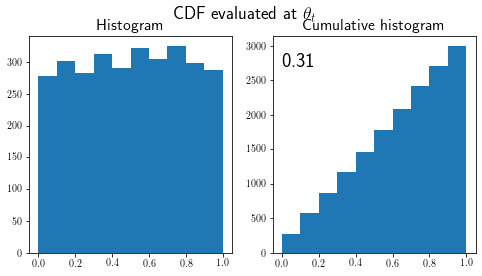

In [ ]:
n= 3000
theta_mu = 90
sigma_m = 5
sigma_p = 25  
sigma_e = 20

_, _, theta_t_cdf, posterior_sample_cdf, shuffled_posterior_sample_cdf = ks_test(n, theta_mu, sigma_p, sigma_e, sigma_m)

#Test

plt.subplots(1,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(theta_t_cdf)
plt.title('Histogram', fontsize = 16)

plt.subplot(1,2,2)
p_val = st.kstest(theta_t_cdf, 'uniform')[1]
plt.hist(theta_t_cdf, cumulative = True)
plt.title('Cumulative histogram', fontsize = 16)
plt.text(0,.9*n, str(np.round(p_val,2)), fontsize = 20)

plt.suptitle(r'CDF evaluated at $\theta_t$', fontsize = 18);

Was the p-value significant (<.05) or not? What did you expect?

We are expecting to operate under the null distribution (since we think we will observe no difference from the uniform distribution), but this does not mean that the p-value will always be non-significant. Under the null of a statistical test, the p-value is a random variable with a uniform distribution which means that we have have an exactly 5% chance to get a significant result. 
You can run the simulation code again ("meta-simulate") in order to check this. 

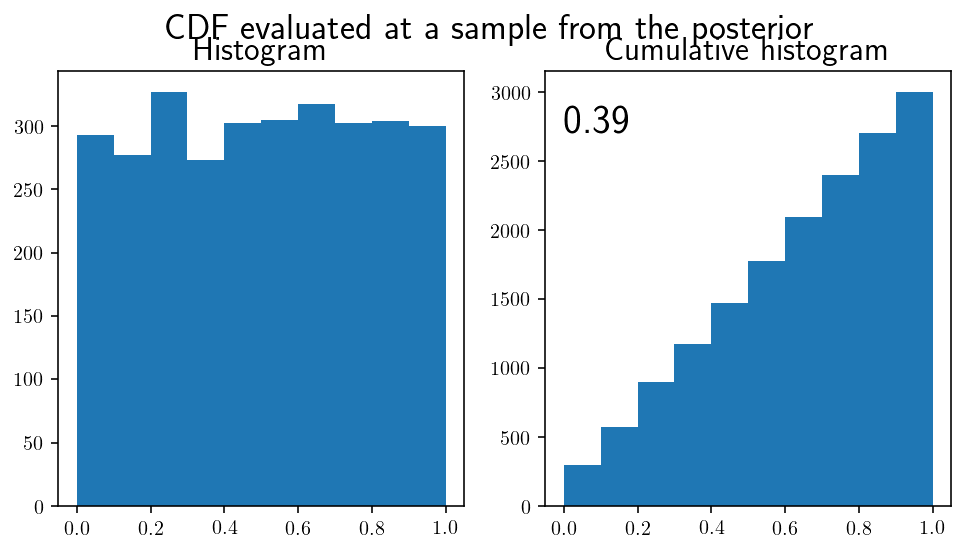

In [ ]:
#Validation with posterior samples

plt.subplots(1,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(posterior_sample_cdf)
plt.title('Histogram', fontsize = 16)

plt.subplot(1,2,2)
p_val = st.kstest(posterior_sample_cdf, 'uniform')[1]
plt.hist(posterior_sample_cdf, cumulative = True)
plt.title('Cumulative histogram', fontsize = 16)
plt.text(0,.9*n, str(np.round(p_val,2)), fontsize = 20)

plt.suptitle(r'CDF evaluated at a sample from the posterior', fontsize = 18);

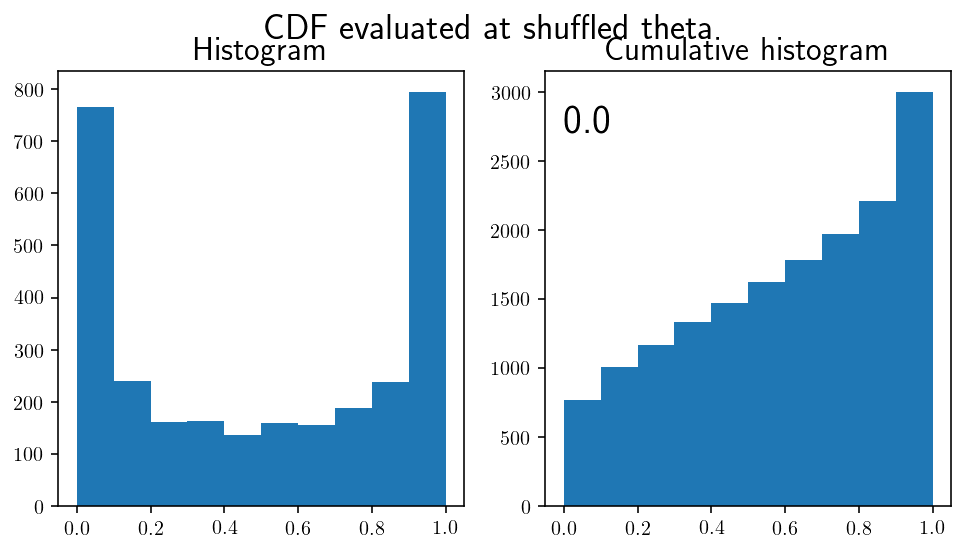

In [ ]:
#Control through trial posterior shuffling

plt.subplots(1,2, figsize = (8,4))
plt.subplot(1,2,1)
plt.hist(shuffled_posterior_sample_cdf)
plt.title('Histogram', fontsize = 16)

plt.subplot(1,2,2)
p_val = st.kstest(shuffled_posterior_sample_cdf, 'uniform')[1]
plt.hist(shuffled_posterior_sample_cdf, cumulative = True)
plt.title('Cumulative histogram', fontsize = 16)
plt.text(0,.9*n, str(np.round(p_val,2)), fontsize = 20)

plt.suptitle(r'CDF evaluated at shuffled theta', fontsize = 18);

##Section 3: Parameter Estimation


We now switch from the perspective of the observer to that of the experimenter who wants to estimate the values of the parameters that best describe the (simulated) data. 

Steps for maximum likelihood estimation:

- evaluate the LLH from the experimenter's view
- verify that the LLH is obtained correctly
- after simulating some data, explore the LLH surface, e.g. by creating 1D sections for each parameter and repeatedly evaluating the LLH such that each parameter is fixed except for one that’s being systematically modified
- optimize LLH: pick an optimization algorithm and fit the data with maximum likelihood estimation, that is, maximize LLH in function of the parameters
  - parameter recovery: generate synthetic data from the model with known parameter values, estimate the parameters, and then compare the estimated and true values
  - summary statistics: simulate data with the MLE parameters and compare the summary statistics of the MLE-simulated data to those generated by the true parameters
  - distribution of responses: compute the response distributions with MLE parameters and assess how well they fit the response distributions with the true parameters


To estimate the $P(\hat{\theta} |\theta_t)$ in the current models, the unobserved quantities ($\theta_p$ and $\theta_e$) will need to be integrated out. As an experimenter we have access to the final estimate $\hat{\theta}$ and the presented stimulus $\theta_t$. 
We will assume $\theta_\mu$ is known and estimate only $\sigma_p, \sigma_e, \sigma_m$.


First, $\theta_p$:

$$ P(\hat{\theta}|\theta_e) = \int d\theta_p P(\hat{\theta}| \theta_p) P(\theta_p| \theta_e) $$

Since $\theta_p$ is a deterministic function of $\theta_e$: 
$ P(\hat{\theta}| \theta_e) = \mathcal{N}(\hat{\theta}; g(\theta_e), \sigma_m)$

$$ P(\hat{\theta}| \theta_t) = \mathcal{N}(\theta_e; \theta_t, \sigma_e) P(\hat{\theta}| \theta_e) $$

$$ P(\hat{\theta}| \theta_t) = \int d\theta_e \mathcal{N}(\theta_e; \theta_t, \sigma_e) \mathcal{N}(\hat{\theta}|  g(\theta_e), \sigma_m) $$



If you would like to do this computationally on the grid like before look at the code below. This is going to be much slower because of the large matrices, so we will use the previous implementation for the simulations. 

You can compare the two functions for speed and accuracy if you would like. Note that if the inference is done on a grid, so should the generation. 

In [ ]:
#Compute negative LLH for the Bayesian model computationally

def llh_bayesian(params, theta_t, theta_hat, d_theta_e=.1):
  """
  Returns the negative loglikelihood for the Bayesian model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution for integration

  Returns:
    -llh (scalar)
  """
    

  ##Like before, we can also compute the llh using a grid method
  def g(theta_e, theta_t):
      """
      Map theta_e to theta_p
    
      Arguments:
        theta_e (array)
        theta_t (array)
    
      Returns
        theta_p (array)
      """
      ...

      return theta_p
    
    
  #unpack the parameters of the llh
  sigma_p, sigma_e, sigma_m = params
  n = len(theta_t)
    
  #linear space for theta_e
  theta_e_linspace = np.arange(0, 180, d_theta_e)
  Z = len(theta_e_linspace) 
    
  #create arrays of size T x Z to be able to apply elementwise multiplication of matrices
  Theta_e = np.array([np.arange(0, 180, d_theta_e),]*n)
  Theta_t = np.array([theta_t,]*Z).transpose()
  Theta_hat = np.array([theta_hat,]*Z).transpose()
    
  #get Theta_p from theta_e
  Theta_p = g(theta_e_linspace, theta_e_linspace)
    
  #motor noise distribution
  mnd = ...
  #evidence distribution
  ed = ...
    
  p_hat = ...
    
  llh = ...

  return -llh 

In [ ]:
#@title Show solution
#Compute negative LLH for the Bayesian model

def llh_bayesian(params, theta_t, theta_hat, d_theta_e=.1):
  """
  Returns the neg loglikelihood for the Bayesian model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution

  Returns:
    -llh (scalar)
  """
    
  def g(theta_e, theta_t):
      """
      Map theta_e to theta_p
    
      Arguments:
        theta_e (array)
        theta_t (array)
    
      Returns
        theta_p (array)
      """
      Prior = st.norm.pdf(theta_t, theta_mu, sigma_p)
      Prior /= Prior.sum()
    
      Likelihood = np.zeros((len(theta_e_linspace), len(theta_t)))
      for i in range(Z-1):
        Likelihood[i,] = st.norm.pdf(theta_e_linspace[i], theta_t, sigma_e)
    
      #choose theta_p that corresponds to the MAP
      Posterior = Likelihood * Prior   
      idx = np.argmax(Posterior, axis = 1)
      theta_p = theta_e_linspace[idx]
    
      return theta_p
    
    
  #unpack the parameters of the llh
  sigma_p, sigma_e, sigma_m = params
  n = len(theta_t)
    
    
  #linear space for theta_e
  theta_e_linspace = np.arange(0, 180, d_theta_e)
  Z = len(theta_e_linspace) 
    
  #create arrays of size T x Z to be able to apply elementwise multiplication of matrices
  Theta_e = np.array([np.arange(0, 180, d_theta_e),]*n)
  Theta_t = np.array([theta_t,]*Z).transpose()
  Theta_hat = np.array([theta_hat,]*Z).transpose()
    
  #get Theta_p from theta_e
  Theta_p = g(theta_e_linspace, theta_e_linspace)
    
  #motor noise distribution
  mnd = st.norm.pdf(Theta_hat, Theta_p, sigma_m)
  #evidence distribution
  ed = st.norm.pdf(Theta_e, Theta_t, sigma_e)
    
  p_hat = d_theta_e * np.sum(ed * mnd, 1)
    
  #compute sum instead of product 
  #add small positive numver to make sure to avoid overflow 
  llh = np.sum(np.log(p_hat + np.finfo(float).eps))

  return -llh 


In [ ]:
# Compute negative LLH for the Bayesian model using distributional properties

def llh_bayesian_fast(params, theta_t, theta_hat):
  """
  Returns the neg loglikelihood for the Bayesian model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution

  Returns:
    -llh (scalar)
  """
  sigma_p, sigma_e, sigma_m = params
    
  post_mu = ...
  post_var = ...
  theta_hat_mu
  theta_hat_var = ...

  p_hat = st.norm.logpdf(theta_hat, theta_hat_mu, np.sqrt(theta_hat_var)) 

  llh = np.sum(p_hat)
  
  return -llh 

In [ ]:
#@title Show solution
# Compute negative LLH for the Bayesian model without grid

def llh_bayesian_fast(params, theta_t, theta_hat):
  """
  Returns the neg loglikelihood for the Bayesian model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution

  Returns:
    -llh (scalar)
  """
  sigma_p, sigma_e, sigma_m = params
    
  post_mu = (theta_mu * sigma_e**2 + theta_t * sigma_p**2) / (sigma_e**2 + sigma_p**2)
  post_var = sigma_e**2 * sigma_p**2 / (sigma_e**2 + sigma_p**2)

  ##Adding motor noise to get theta_hat posterior distribution
  theta_hat_var = post_var + sigma_m**2

  p_hat = st.norm.logpdf(theta_hat, post_mu, np.sqrt(theta_hat_var)) 

  llh = np.sum(p_hat)
  
  return -llh 

The switching model negative LLH. 

In [ ]:
#Compute negative LLH for the Switching model on the grid 

def llh_switch(params, theta_t, theta_hat, d_theta_e=.1):
  """
  Returns the neg loglikelihood for the Switching model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m  
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution

  Returns:
    -llh (scalar)
  """

  #unpack the parameters of the llh
  sigma_p, sigma_e, sigma_m = params

  n = len(theta_t)

  #linear space for theta_e
  theta_e_linspace = np.arange(0, 180, d_theta_e)
  Z = len(theta_e_linspace) 

  #create arrays of size T x Z to be able to apply elementwise multiplication of matrices
  Theta_e = np.array([np.arange(0, 180, d_theta_e),]*n)
  Theta_t = np.array([theta_t,]*Z).transpose()
  Theta_hat = np.array([theta_hat,]*Z).transpose()
 
  #switching ratio
  p_prior = sigma_e/ (sigma_p + sigma_e)

  #motor noise distribution
  mnd =  ...
  #evidence distribution
  ed = ...

  p_hat = ...

  llh = ...

  return -llh

In [ ]:
#@title Show solution
#Compute negative LLH for the Switching model

def llh_switch(params, theta_t, theta_hat, d_theta_e=.1):
  """
  Returns the neg loglikelihood for the Switching model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m  
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution

  Returns:
    -llh (scalar)
  """

  #unpack the parameters of the llh
  sigma_p, sigma_e, sigma_m = params

  n = len(theta_t)

  #linear space for theta_e
  theta_e_linspace = np.arange(0, 180, d_theta_e)
  Z = len(theta_e_linspace) 

  #create arrays of size T x Z to be able to apply elementwise multiplication of matrices
  Theta_e = np.array([np.arange(0, 180, d_theta_e),]*n)
  Theta_t = np.array([theta_t,]*Z).transpose()
  Theta_hat = np.array([theta_hat,]*Z).transpose()
 
  #switching ratio
  p_prior = sigma_e/ (sigma_p + sigma_e)

  #motor noise distribution
  mnd =  p_prior * st.norm.pdf(Theta_hat, theta_mu, sigma_m)   + (1-p_prior) *  st.norm.pdf(Theta_hat, Theta_e, sigma_m)
  #evidence distribution
  ed = st.norm.pdf(Theta_e, Theta_t, sigma_e) 

  p_hat = d_theta_e * np.sum(mnd*ed, 1)

  llh = np.sum(np.log(p_hat+ np.finfo(float).eps))

  return -llh

In [ ]:
#@title Show solution
def llh_switch_fast(params, theta_t, theta_hat):
  """
  Returns the neg loglikelihood for the Switching model

  Arguments:
  
    params (list): contains sigma_p, sigma_e, sigma_m
                   format required by the optimization function 
    theta_t (array of ints)
    theta_hat (array )
    d_theta_e (scalar): resolution

  Returns:
    -llh (scalar)
  """
  sigma_p, sigma_e, sigma_m = params
    

  p_hat = p_prior * st.norm.pdf(theta_hat, theta_t, np.sqrt(sigma_e**2 + sigma_m**2)) + \
        (1- p_prior) * st.norm.pdf(theta_hat, theta_mu, np.sqrt(sigma_p**2 + sigma_m**2))
 
  llh = np.sum(np.log(p_hat))
  
  return -llh 

###Explore the LLH surface

Simulate data with a given parameter combination, and then obtain the LLH of the parameters repeatedly while one (or more) parameter/s is being systematically modified

Potential pitfalls and their treatments:

- multiple peaks in a subplot: there are many local optima, so fitting will have to be carried out more aggressively

- a single peak far from the true value: there is a bug in the code that causes the log-likelihood to be higher around a value that’s not close to the one that generated the data

- curve is flat, peak not on true value: with a finite amount of data, the log-likelihood may not be maximal at the true parameter value, so simulate more data and repeat the process


In [ ]:
# Bayesian model

# simulate one dataset with given parameter values
n = 100
theta_mu = 90; sigma_p = 10; sigma_e = 15; sigma_m = 5

theta_t, _, theta_hat = simulate_bayes_observer(n, theta_mu, sigma_p, sigma_e, sigma_m)


In [ ]:
# calculate the llh at a range of sigma_p values 
sigma_p_eval = np.arange(2, 50, 1)

est_p = np.zeros(len(sigma_p_eval))
for i in range(len(sigma_p_eval)):
  est_p[i] = llh_bayesian([sigma_p_eval[i], sigma_e, sigma_m], theta_t, theta_hat)

# calculate the llh at a range of sigma_e values
sigma_e_eval = np.arange(2, 50, 1)

est_e = np.zeros(len(sigma_e_eval))
for i in range(len(sigma_e_eval)):
  est_e[i] = llh_bayesian([sigma_p, sigma_e_eval[i], sigma_m], theta_t, theta_hat)

# calculate the llh at a range of sigma_m values
sigma_m_eval = np.arange(1, 10, 1)

est_m = np.zeros(len(sigma_m_eval))
for i in range(len(sigma_m_eval)):
  est_m[i] = llh_bayesian([sigma_p, sigma_e, sigma_m_eval[i]], theta_t, theta_hat)


Bayesian model


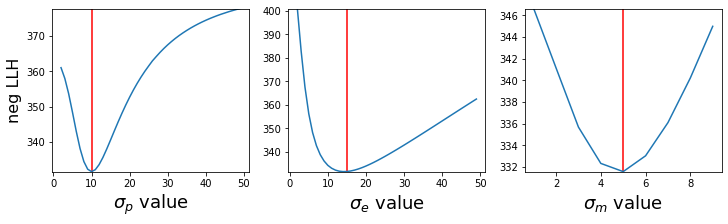

In [ ]:
#plot the 1D -llh space for the bayesian model

print('Bayesian model')
plt.subplots(1,3, figsize = (12,3))

plt.subplot(1,3,1)
plt.plot(sigma_p_eval, est_p)
plt.ylim(np.min(est_p), np.max(est_p))
plt.vlines(sigma_p, ymin = np.min(est_p), ymax = np.max(est_p), color ='red')
plt.ylabel('neg LLH', fontsize = 16)
plt.xlabel(r'$\sigma_p$ value', fontsize = 18)

plt.subplot(1,3,2)
plt.plot(sigma_e_eval, est_e)
plt.ylim(np.min(est_e), np.max(est_e))
plt.vlines(sigma_e, ymin = np.min(est_e), ymax = np.max(est_e), color ='red')
#plt.ylabel('neg LLH', fontsize = 16)
plt.xlabel(r'$\sigma_e$ value', fontsize = 18)

plt.subplot(1,3,3)
plt.plot(sigma_m_eval, est_m)
plt.ylim(np.min(est_m), np.max(est_m))
plt.vlines(sigma_m, ymin = np.min(est_m), ymax = np.max(est_m), color ='red')
#plt.ylabel('neg LLH', fontsize = 16)
plt.xlabel(r'$\sigma_m$ value', fontsize = 18);

In [ ]:
# Switching model

# simulate the data from a sigma_p value
theta_t, _, theta_hat = simulate_switch_observer(n, theta_mu, sigma_p, sigma_e, sigma_m)

# calculate the -llh at a range of sigma_p values
sigma_p_eval = np.arange(2, 50, 1)

est_p = np.zeros(len(sigma_p_eval))
for i in range(len(sigma_p_eval)):
  est_p[i] = llh_switch([sigma_p_eval[i], sigma_e, sigma_m], theta_t, theta_hat)

# calculate the -llh at a range of sigma_e values
sigma_e_eval = np.arange(2, 50, 1)

est_e = np.zeros(len(sigma_e_eval))
for i in range(len(sigma_e_eval)):
  est_e[i] = llh_switch([sigma_p, sigma_e_eval[i], sigma_m], theta_t, theta_hat)

# calculate the -llh at a range of sigma_m values
sigma_m_eval = np.arange(1, 10, 1)

est_m = np.zeros(len(sigma_m_eval))
for i in range(len(sigma_m_eval)):
  est_m[i] = llh_switch([sigma_p, sigma_e, sigma_m_eval[i]], theta_t, theta_hat)


Switching model


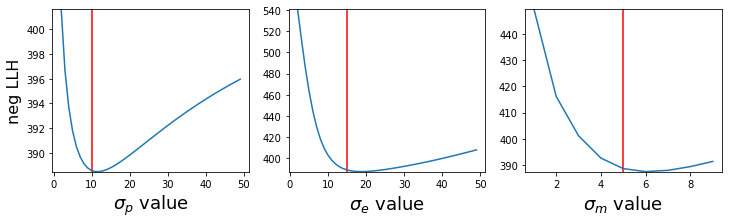

In [ ]:
#plot the 1D -llh space

print('Switching model')
plt.subplots(1,3, figsize = (12,3))

plt.subplot(1,3,1)
plt.plot(sigma_p_eval, est_p)
plt.ylim(np.min(est_p), np.max(est_p))
plt.vlines(sigma_p, ymin = np.min(est_p), ymax = np.max(est_p), color ='red')
plt.ylabel('neg LLH', fontsize = 16)
plt.xlabel(r'$\sigma_p$ value', fontsize = 18)

plt.subplot(1,3,2)
plt.plot(sigma_e_eval, est_e)
plt.ylim(np.min(est_e), np.max(est_e))
plt.vlines(sigma_e, ymin = np.min(est_e), ymax = np.max(est_e), color ='red')
plt.xlabel(r'$\sigma_e$ value', fontsize = 18)

plt.subplot(1,3,3)
plt.plot(sigma_m_eval, est_m)
plt.ylim(np.min(est_m), np.max(est_m))
plt.vlines(sigma_m, ymin = np.min(est_m), ymax = np.max(est_m), color ='red')
plt.xlabel(r'$\sigma_m$ value', fontsize = 18);

####Optimize the LLH and test parameter recovery

Steps:
- initial conditions: the optimization algorithm is guaranteed to find a local minimum, not the global minimum, so we’ll fit a given data set with different initial parameter settings. define multiple parameter vectors that will serve as starting points in the M-dimensional parameter space where the optimization is initialized

- optimization algorithm: pick one (here scipy.optimize.minimize implementing the Nelder-Mead, equivalent to Matlab's fminsearch), and on each run, feed it the data, the current initial condition, and the function that evaluates the log- likelihood of a given parameter vector on a given data set

- pick a winner: at the end of each run, store the estimated parameters and their log-likelihoods, and when optimization is finished, the parameter vector with the highest log-likelihood is the maximum-likelihood estimate
how many initial conditions? validate it by plotting the estimate after each run. the estimate will improve up to an asymptote that’s close to the global optimum
how to optimize further? run on GPU, validate different solutions by running them many times and compute the average run time
- what other optimization algorithms are out there? STAN, BADS, VBMC...

- optimized code: it’s usually worth it to vectorize whatever you can, but always consider the trade-off between how much effort it takes and how much faster it makes the code


Normally this entails simulating multiple datasets per participant. Here, we will stick with just one participant and a limited set of parameter values.

In [ ]:
#if the cell takes too long to run, reduce the number of simulations
# choose initial conditions from which to simulate data 
theta_mu = 90
sigma_p_test = [10, 10, 10, 15, 15, 15, 20, 20, 20]
sigma_e_test = [10, 15, 20, 10, 15 ,20, 10, 15, 20]
sigma_m_test = [ 2, 2, 2, 2, 5, 5,5 , 5, 5]

n = 100
nsim = len(sigma_p_test)

initialize = lambda n, nsim: [np.zeros(nsim) for _ in range(n)]

sigma_p_mle_bayes, sigma_e_mle_bayes, sigma_m_mle_bayes,\
sigma_p_mle_switch, sigma_e_mle_switch, sigma_m_mle_switch,\
nllh_bayes, nllh_switch, est_nllh_bayes, est_nllh_switch = initialize(10,nsim)

init = [30,30,10] 

for i in range(nsim): 

  #for the bayesian model

  #generate dataset
  theta_t, _, theta_hat = simulate_bayes_observer(n, theta_mu, sigma_p_test[i], sigma_e_test[i], sigma_m_test[i])
  #values of nllh at ground truth values of parameters
  nllh_bayes[i] = llh_bayesian([sigma_p_test[i], sigma_e_test[i], sigma_m_test[i]], theta_t, theta_hat)
  #optimize
  res_bayes = scipy.optimize.minimize(llh_bayesian, x0= init, args=(theta_t ,theta_hat))
  #get mle estimates
  sigma_p_mle_bayes[i], sigma_e_mle_bayes[i], sigma_m_mle_bayes[i] = res_bayes.x
  #evaluate nllh at the estimates
  est_nllh_bayes[i] = res_bayes.fun 
  #est_nllh_bayes[i] = llh_bayesian([sigma_p_mle_bayes[i], sigma_e_mle_bayes[i], sigma_m_mle_bayes[i]], theta_t, theta_hat)


In [ ]:
for i in range(nsim):
  #repeat for the switching model  
  theta_t, _, theta_hat = simulate_switch_observer(n, theta_mu, sigma_p_test[i], sigma_e_test[i], sigma_m_test[i])
  nllh_switch[i] = llh_switch([sigma_p_test[i], sigma_e_test[i], sigma_m_test[i]], theta_t, theta_hat)
  res_switch = scipy.optimize.minimize(llh_switch, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')
  sigma_p_mle_switch[i], sigma_e_mle_switch[i], sigma_m_mle_switch[i] = res_switch.x
  est_nllh_switch[i] = llh_switch([sigma_p_mle_switch[i], sigma_e_mle_switch[i], sigma_m_mle_switch[i]], theta_t, theta_hat)

Check how close the estimates are to the ground truth generation parameters. 

In [ ]:
# plot the MLE estimates against the true values

#bayesian model
plt.subplots(2,3, figsize = (12,6))

plt.subplot(2,3,1)
plt.plot(sigma_p_test, sigma_p_mle_bayes, 'r.')
plt.plot(sigma_p_test,sigma_p_test,'k-') # identity line
plt.xlabel(r'true $\theta_p$', fontsize = 18)
plt.ylabel(r'Bayesian MLE $\theta_p$', fontsize = 18)

plt.subplot(2,3,2)
plt.plot(sigma_e_test, sigma_e_mle_bayes, 'r.')
plt.plot(sigma_e_test,sigma_e_test,'k-') # identity line
plt.xlabel(r'true $\theta_e$', fontsize = 18)
plt.ylabel(r'MLE $\theta_e$', fontsize = 18)

plt.subplot(2,3,3)
plt.plot(sigma_m_test, sigma_m_mle_bayes, 'r.')
plt.plot(sigma_m_test,sigma_m_test,'k-') # identity line
plt.xlabel(r'true $\theta_m$', fontsize = 18)
plt.ylabel(r'MLE $\theta_m$', fontsize = 18)


#switching model
plt.subplot(2,3,4)
plt.plot(sigma_p_test, sigma_p_mle_switch, 'r.')
plt.plot(sigma_p_test,sigma_p_test,'k-') # identity line
plt.xlabel(r'true $\theta_p$', fontsize = 18)
plt.ylabel(r'Switching MLE $\theta_p$', fontsize = 18)

plt.subplot(2,3,5)
plt.plot(sigma_e_test, sigma_e_mle_switch, 'r.')
plt.plot(sigma_e_test,sigma_e_test,'k-') # identity line
plt.xlabel(r'true $\theta_e$', fontsize = 18)
plt.ylabel(r'MLE $\theta_e$', fontsize = 18)

plt.subplot(2,3,6)
plt.plot(sigma_m_test, sigma_m_mle_switch, 'r.')
plt.plot(sigma_m_test,sigma_m_test,'k-') # identity line
plt.xlabel(r'true $\theta_m$', fontsize = 18)
plt.ylabel(r'MLE $\theta_m$', fontsize = 18);

Let's evaluate the neg LLH at the ground truth parameters and at the MLE estimates of the parameters.

What kind of errors could this plot help reveal?



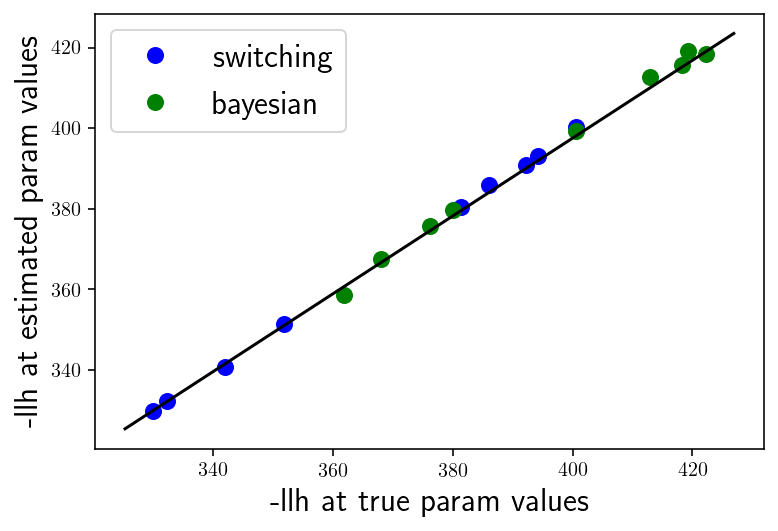

In [ ]:
# plt LLH: MLE vs True parameters

plt.plot(nllh_bayes, est_nllh_bayes, 'r.', color = 'blue', markersize = 15)
plt.plot(nllh_switch, est_nllh_switch, 'r.', color = 'green', markersize = 15)
plt.legend({'bayesian','switching'}, fontsize = 16)
plt.xlabel('-llh at true param values', fontsize = 16)
plt.ylabel('-llh at estimated param values', fontsize = 16)

x_lims = plt.gca().get_xlim()
y_lims = plt.gca().get_ylim()
plt.plot(x_lims, y_lims, 'k-', color = 'black');

####Fitting the results: Summary statistics and estimate distributions

Simulate data with the MLE parameters and compare the summary statistics of the MLE-simulated data to that of the true parameters

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in log


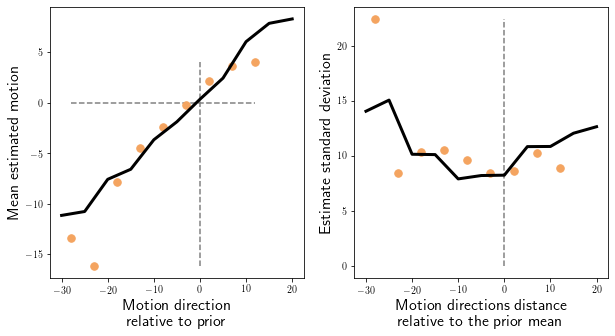

In [ ]:
#simulate just one dataset
n = 1000
sigma_p = 10
sigma_e = 10
sigma_m = 5
theta_t, _, theta_hat = simulate_switch_observer(n, theta_mu, sigma_p, sigma_e, sigma_m)

# estimate distributions
res_switch = scipy.optimize.minimize(llh_switch, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')
sigma_p_mle_switch, sigma_e_mle_switch, sigma_m_mle_switch = res_switch.x

theta_t_mle, _, theta_hat_mle = simulate_switch_observer(n, theta_mu, sigma_p_mle_switch, sigma_e_mle_switch, sigma_m_mle_switch)
#plot the summary stats for the estimate generates dataset

plt.subplots(1,2,figsize = (10,5))

plt.subplot(1,2,1)
bins1, bin_means1, bin_stds1 = create_bins(theta_mu - theta_t_mle, theta_mu - theta_hat_mle)
plt.plot(bins1, bin_means1, 'r.', markersize = 15, color = 'sandybrown')
plt.vlines(0, ymin = np.min(bin_means1), ymax = np.max(bin_means1), color = 'gray', linestyle = '--')
plt.hlines(0, xmin = np.min(bins1), xmax = np.max(bins1), color = 'gray', linestyle = '--')
plt.xlabel('Motion direction \nrelative to prior', fontsize = 16)
plt.ylabel('Mean estimated motion', fontsize = 16)

#overlay original
bins, bin_means, bin_stds = create_bins(theta_mu - theta_t, theta_mu - theta_hat,5)
plt.plot(bins, bin_means, 'k-', markersize = 15, color = 'black', linewidth =3)

plt.subplot(1,2,2)

plt.plot(bins1, bin_stds1, 'r.', markersize = 15, color = 'sandybrown')
plt.plot(bins, bin_stds, 'k-', markersize = 15, color = 'black', linewidth = 3)
plt.vlines(0, ymin = 0, ymax = np.max(bin_stds1), color = 'gray', linestyle = '--')
plt.xlabel('Motion directions distance \n relative to the prior mean', fontsize = 16)
plt.ylabel('Estimate standard deviation', fontsize = 16);

##Section 5: Model comparison

How to establish which model fits the data best/ is likely to be more predictive of future data?

1. Cross-validation: fit models on a subset of the data and assess predictive performance on the remaining data

2. Approximate validation performance with model selection criterions

- LLH comparison: 
  * computing the model evidence requires marginalization of the parameters of the model, can be intractable
  * can lead to overfitting
- BIC and AIC: approximations to the marginal likelihood $P(D|M)$, methods of model comparison that correct for the bias of maximum likelihood by the addition of a penalty term to compensate for the overfitting of more complex models

$$AIC = log P(Data|\theta_{MLE}, M) − M$$
$$BIC = log P(Data|\theta_{MLE}, M) − \frac{1}{2} M lnN$$

where $P(Data|\theta_{MLE})$ is the maximum values of LLH function, M is the number of parameters and N is the number of datapoints.


For those who want more information on model comparison metrics, [Gelman et al. (2014)](https://doi.org/10.1007/s11222-013-9416-2) is a good source.
For the derivation of the BIC (use Laplace approximation to the model evidence) and AIC (minimize the KL distance between the true and the approximate distribution) follow the links: [BIC](http://wittawat.com/posts/laplace_apporx_bic.html) and [AIC](https://towardsdatascience.com/akaike-information-criteria-942d1f554537).


###Model comparison validation 

We will simulate datasets using either of the two observers, fit both models to the data and then ask whether the model that simulated it is the most likely to have generated the data. This will result in a 2x2 confusion matrix for model recovery.



The models have the same number of parameters, so the AIC and BIC should not yield different patterns of results.

In [ ]:
#simulate observers and compute AIC and BIC
nsim = 4

theta_mu = 90
sigma_p = 15
sigma_e = 10
sigma_m = 5
init = [10,10,10]

M = 3
N = 100

aic = ...
bic = ...

llh_S_S, llh_S_B, aic_S_S, aic_S_B, bic_S_S, bic_S_B,\
llh_B_S, llh_B_B, aic_B_S, aic_B_B, bic_B_S, bic_B_B = initialize(12, nsim)


In [ ]:
#@title Show solution
#simulate observers and compute AIC and BIC
nsim = 4

theta_mu = 90
sigma_p = 15
sigma_e = 10
sigma_m = 5
init = [10,10,10]

M = 3
N = 100
aic = lambda max_llh : max_llh - M 
bic = lambda max_llh : max_llh - .5*M*np.log(N)

llh_S_S, llh_S_B, aic_S_S, aic_S_B, bic_S_S, bic_S_B,\
llh_B_S, llh_B_B, aic_B_S, aic_B_B, bic_B_S, bic_B_B = initialize(12, nsim)

Simulate data from the Bayesian and switching models and then estimate parameters using either of these models and calculate the LLH, BIC, AIC.

In [ ]:
##simulate from the Bayesian model

for i in range(nsim):

  #generate data
  theta_t, _, theta_hat = simulate_switch_observer(N, theta_mu, sigma_p, sigma_e, sigma_m)

  #fit the two models on the same dataset
  res_switch = scipy.optimize.minimize(llh_switch, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')
  res_bayes = scipy.optimize.minimize(llh_bayesian, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')

  #calculate llh, aic, bic
  llh_S_S[i] = res_switch.fun
  llh_S_B[i] = res_bayes.fun
  aic_S_S[i] = aic(res_switch.fun)
  aic_S_B[i] = aic(res_bayes.fun)
  bic_S_S[i] = bic(res_switch.fun)
  bic_S_B[i] = bic(res_bayes.fun)

##simulate from the Switching model

for i in range(nsim):

  #generate data
  theta_t, _, theta_hat = simulate_bayes_observer(N, theta_mu, sigma_p, sigma_e, sigma_m)

  #fit the two models on the same dataset
  res_switch = scipy.optimize.minimize(llh_switch, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')
  res_bayes = scipy.optimize.minimize(llh_bayesian, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')
 
  #calculate llh, aic, bic
  llh_B_S[i] = res_switch.fun
  llh_B_B[i] = res_bayes.fun
  aic_B_S[i] = aic(res_switch.fun)
  aic_B_B[i] = aic(res_bayes.fun)
  bic_B_S[i] = bic(res_switch.fun)
  bic_B_B[i] = bic(res_bayes.fun)

KeyboardInterrupt: ignored

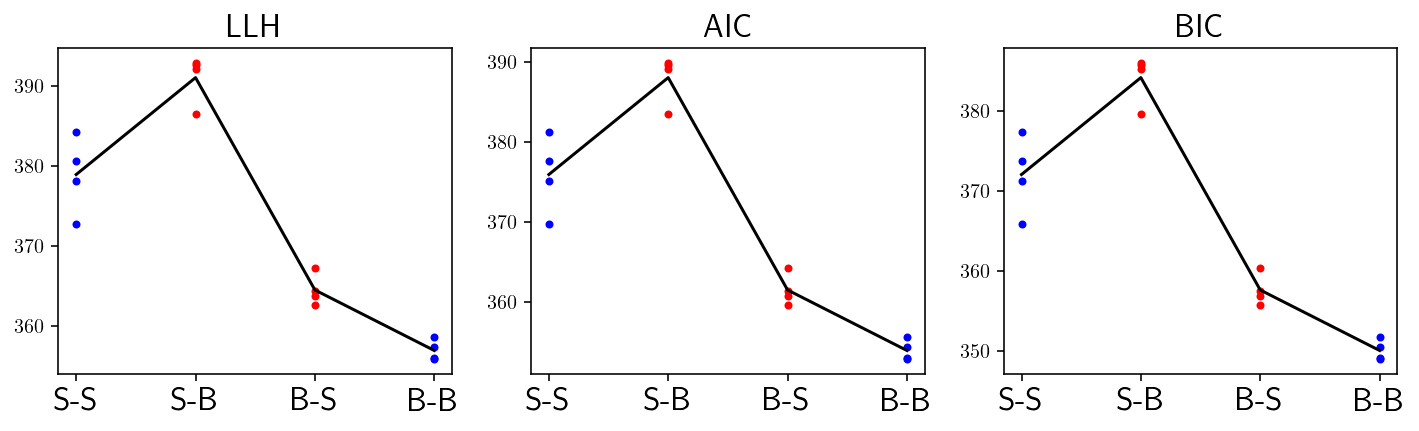

In [ ]:
#plot the confusion matrix? perhaps better to do barplots

# plot the llh, aic, bic values for the 4 resulting conditions

def plot_metric(p, metric, values):
  plt.subplot(1,3,p)
  plt.title(metric, fontsize = 16)
  plt.plot(np.zeros(nsim)+1, values[0], 'b.')
  plt.plot(np.zeros(nsim)+2, values[1], 'r.')
  plt.plot(np.zeros(nsim)+3, values[2], 'r.')
  plt.plot(np.zeros(nsim)+4, values[3], 'b.')
  #plot means
  plt.plot([1,2,3,4], np.array([np.mean(xi) for xi in values]), color = 'black' )
  plt.xticks([1,2,3,4], ['S-S', 'S-B', 'B-S', 'B-B'], fontsize =16)


plt.subplots(1,3, figsize = (12, 3))
plot_metric(1, 'LLH', [llh_S_S, llh_S_B, llh_B_S, llh_B_B])
plot_metric(2, 'AIC', [aic_S_S, aic_S_B, aic_B_S, aic_B_B])
plot_metric(3, 'BIC', [bic_S_S, bic_S_B, bic_B_S, bic_B_B])


Where condition names are Generation - Estimation, so that S - B means Switching model for generation and Bayesian model for estimation.

###Bonus task: 
Using what you learned in the Machine Learning tutorial, apply cross-validation for the model validation.

###Bonus task: Can we show a qualitative difference between models?

Based on the observed data, we can use kernel density estimation to retrieve the empirical distribution of the responses $\hat{\theta}$ for every true $\theta_t$ value. This would result in a matrix with each $\theta_t$'s based predictions in one column. 

We can then overlay the expected response ($\theta_p$) for every true stimulus based on the model's predictions using the true parameters. 

How do you expect the prediction lines to look like in this space?

In [ ]:
#generate data
n = 5000
theta_mu = 90
sigma_p = 40
sigma_e = 40
sigma_m = 10

theta_t, _, theta_hat = simulate_bayes_observer(n, theta_mu, sigma_p, sigma_e, sigma_m)

#compute matrix from simulated data
x = np.arange(0,180, 1)
mat = np.zeros((len(x), len(x)))

#instantiate KDE model
kde = KernelDensity(bandwidth=sigma_m, kernel='gaussian')

for i in range(len(x)):
  #select all responses where the true stimulus is theta_t
  responses = ...
  #if there are any responses
  if len(responses)>0: 
    #estimate gaussian, hint: kde method name is fit  
    ...
    #return the log_probability density
    logprob = kde.score_samples(x[:, None])
    prob =  ...
    #add column to matrix
    mat[:,x[i]] = ...

In [ ]:
#@title Show solution
#generate data
n=5000
theta_mu = 90
sigma_p = 40
sigma_e = 40
sigma_m = 10

theta_t, _, theta_hat = simulate_bayes_observer(n, theta_mu, sigma_p, sigma_e, sigma_m)

#compute matrix from simulated data
x = np.arange(0,180, 1)
mat = np.zeros((len(x), len(x)))

#define kernel
kde = KernelDensity(bandwidth=sigma_m, kernel='gaussian')

for i in range(len(x)):
  #select all responses where the true stimulus is theta_t
  responses = theta_hat[theta_t == x[i]]
  #if there are any responses
  if len(responses)>0: 
    #estimate gaussian
    kde.fit(responses[:, None])
    #return the log_probability density
    logprob = kde.score_samples(x[:, None])
    prob =  np.exp(logprob) 
    #add column to matrix
    mat[:,x[i]] = prob/prob.sum()

In [ ]:
#fit models
init = [10,10,10]
res_switch = scipy.optimize.minimize(llh_switch, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')
res_bayes = scipy.optimize.minimize(llh_bayesian, x0= init, args=(theta_t ,theta_hat),  method = 'Nelder-Mead')

#predictions from bayesian model using true param values
sigma_p_bayes, sigma_e_bayes, sigma_m_bayes = res_bayes.x

#for every theta_t and theta_e combination, the expected gauss mean is 
#sigma_e**2*theta_mu + sigma_p_bayes**2*theta_e / (sigma_e + sigma_p)
#since the most likely theta_e for every theta_t is theta_t this will result in a diagonal line if sigmas are equal


prior = st.norm.pdf(x ,theta_mu, sigma_p_bayes)
prior /= prior.sum()
#evidence for every trial
Likelihood = np.zeros((len(x), len(x)))
for i in range(len(x)):
  Likelihood[i,:] = st.norm.pdf(x[i], x, sigma_e_bayes)
#posterior proportional to likelihood x prior for every trial
Posterior_distribution = Likelihood * prior  
#find index of MAP
idx = np.argmax(Posterior_distribution, axis = 1)
#choose theta_p = MAP
theta_p_bayes = x[idx]


#predictions from switch model using true param values
sigma_p_switch, sigma_e_switch, sigma_m_switch = res_switch.x
ratio = sigma_e_switch/ (sigma_e_switch + sigma_p_switch)
theta_p_switch = np.zeros(len(x))
for i in range(len(x)):
  theta_p_switch[i] = ratio * theta_mu + (1-ratio) * x[i]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in log


Text(0.5, 1.0, '$\\sigma_p = $40, $\\sigma_e = $40')

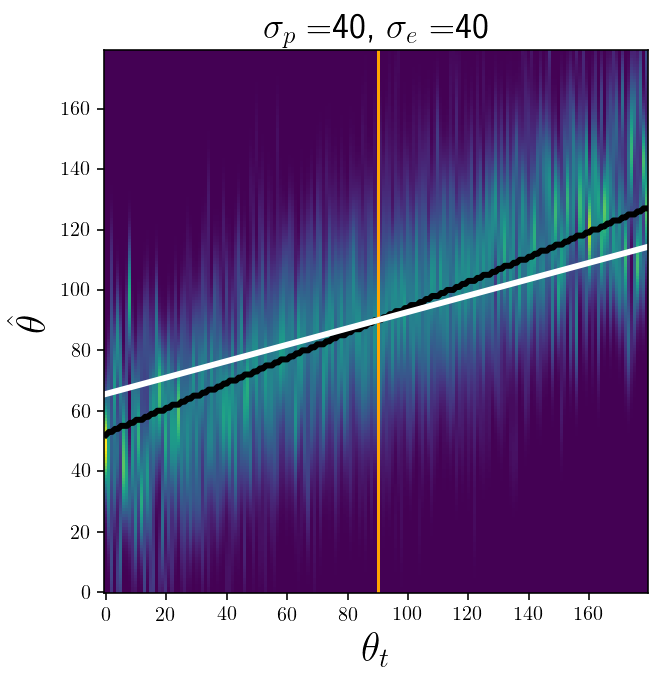

In [ ]:
#plot matrix
plt.figure(figsize = (5,5))
plt.imshow(mat, origin = 'lower')
plt.plot([theta_mu]*len(x), x, color = "orange") #prior
#plt.plot( x, x, color = "black") #likelihood
plt.plot(x, theta_p_bayes, color = 'black', linewidth=3)
plt.plot(x, theta_p_switch, color = 'white', linewidth=3)
plt.xlabel(r"$\theta_t$", fontsize = 20)
plt.ylabel(r"$\hat{\theta}$", fontsize = 20)
plt.title(r"$\sigma_p = $" + str(sigma_p) + r", $\sigma_e = $" + str(sigma_e), fontsize = 18);




### Well done! Time to fit the models on the experimental data!





###Additional readings and references:

Geisler, W. S. 2003. Ideal Observer Analysis. In The Visual Neurosciences, L. Chalupa and J. Werner, eds., Pp. 825–837. Boston: MIT Press.https://www.cns.nyu.edu/csh/csh06/PDFs/Ideal-Observer-Analysis.pdf

Gelman, A., Hwang, J. & Vehtari, A. 2014. Understanding predictive information criteria for Bayesian models. Stat Comput 24, 997–1016. https://doi.org/10.1007/s11222-013-9416-2

Laquitaine, S. and Gardner, J. L. 2018. A Switching Observer for Human Perceptual Estimation. Neuron, 97(2):462–4 https://www.sciencedirect.com/science/article/pii/S0896627317311340